# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


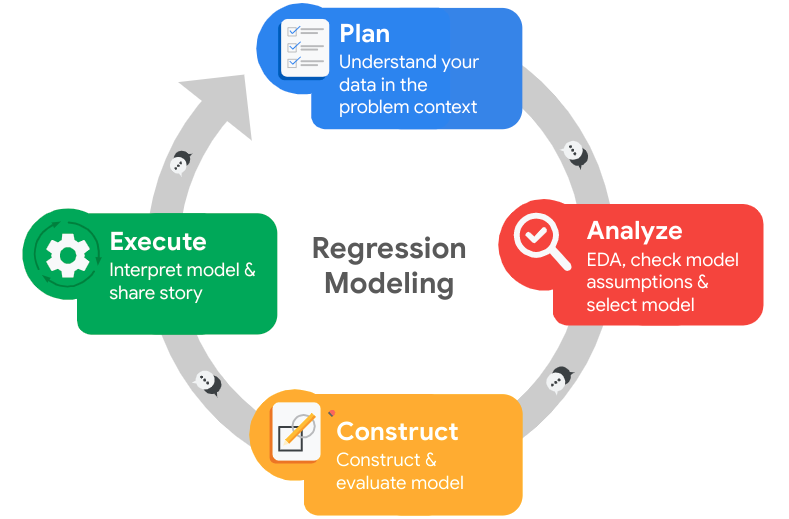

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stakeholder for this project is Salifort Motors. We are trying to understand the reasons why an employee may leave the company, in order to increase employee retention. We should ensure our model does not directly/indirectly discriminate on grounds such as race/gender etc. 

From initial observations, some formatting/correcting spelling had to be done. There were duplicates present in the data (which are highly unlikely to be real) and there are some outliers which are present in the 'tenure' data. 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from xgboost import XGBClassifier, XGBRegressor, plot_importance

# For saving models
import pickle

# Other helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,\
roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Work_accident': 'work_accident',
                          'promotion_last_5years': 'promotion_last_5_years',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum(axis=0)


satisfaction_level        0
last_evaluation           0
number_project            0
average_monthly_hours     0
tenure                    0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

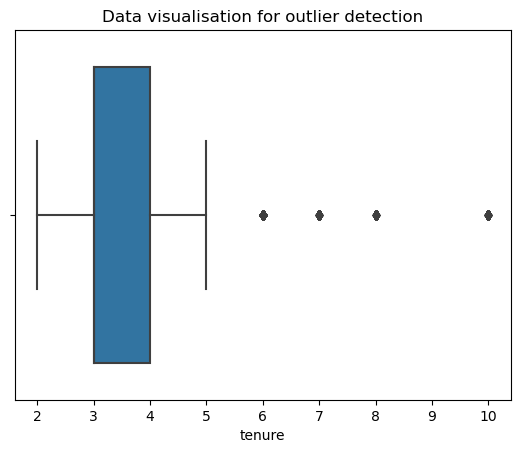

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.title('Data visualisation for outlier detection')
sns.boxplot(x=df1['tenure']);

In [12]:
# Determine the number of rows containing outliers

# Any values outside 1.5*IQR will be considered outliers here

# Calculate 25th and 75th percentiles
p25 = df1['tenure'].quantile(0.25)
p75 = df1['tenure'].quantile(0.75)

# Find the interquartile range
iqr = p75 - p25

# Establish limits
upper_limit = p75 + (1.5*iqr)
lower_limit = p25 - (1.5*iqr)

# Identify outlier rows
outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

print(f"Number of rows containing outliers (in 'tenure'): {len(outliers)}")

Number of rows containing outliers (in 'tenure'): 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

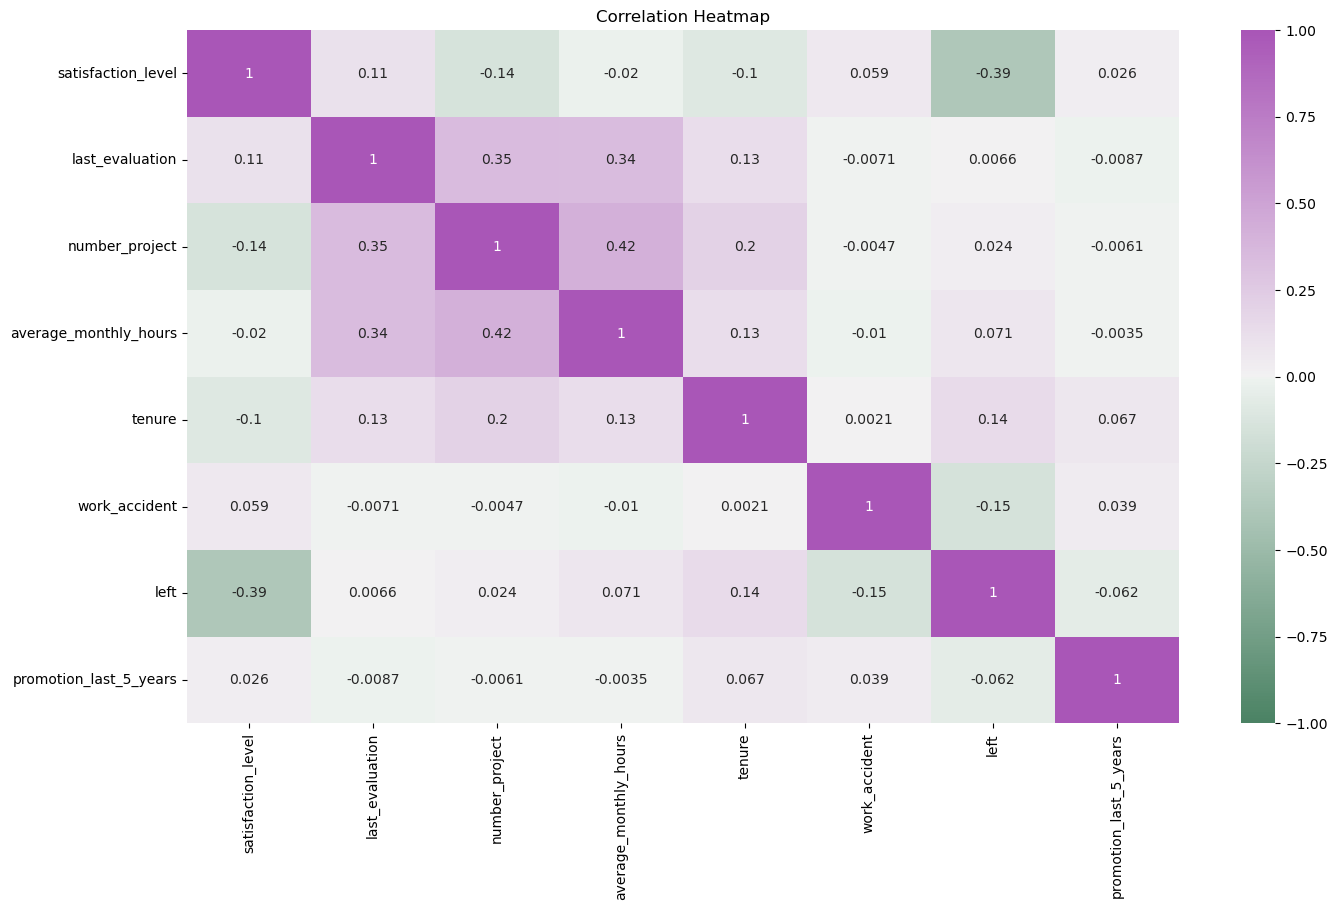

In [14]:
# A correlation heatmap to show relationships between each numerical variable pair

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True))
heatmap.set_title('Correlation Heatmap');

From this heatmap, we can see that the number of projects, average monthly hours, and last evaluation scores are all positively correlated with each other, and also all weakly positvely correlated with tenure. There is also a negative correlation between satisfaction level and wether the employee left. We can now take a closer look at these relationships.

Firstly, we create a stacked boxplot showing the average monthly hour distributions for the varying number of projects, with distinction between employees who left and stayed. 

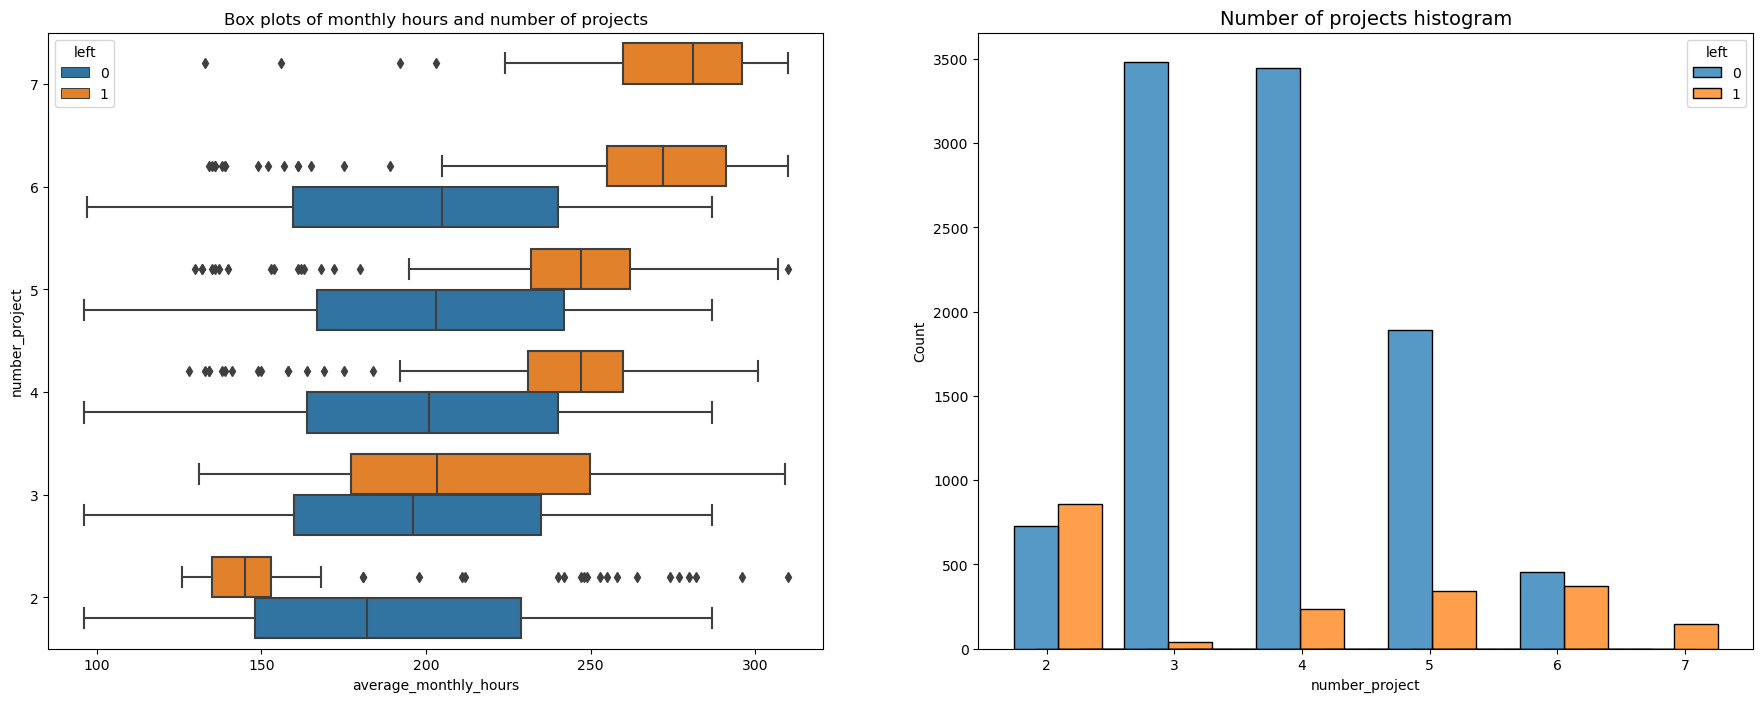

In [15]:
# A data visualisation for the relationship between number of projects and average monthly hours.
# Stacked boxplots are used here, along with an accompanying stacked histogram to understand the 
# hidden number of projects distribution

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create stacked boxplot, with distinction between those that left and those that did not
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis() # Invert for a more intuitive y-axis
ax[0].set_title('Box plots of monthly hours and number of projects')

# Create stacked boxplot, with distinction between those that left and those that did not
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=4, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

There are a few notable insights to derive from the above visualisations. 
1. As expected, the general trend is that for a larger number of projects, the average monthly hours are higher.

2. Focusing on those employees who contributed to 2 projects (which is the minimum here), we can see that employees that then left had worked signficantly less hours than those that did not leave. Possible explanations could be that they were let go, or had already been being phased out of work. 

3. For employees who contributed to 4+ projects, those that then left are seen to have worked significantly more hours than those that did not leave. It's fair to assume the vast majority of these employees quit. Everyone who contributed to 7 projects left. 

4. The ratio of employees that left to those that stayed is largest for employees that contributed to 3/4 projects, suggesting that this is an ideal amount. 

5. For an average workplace, around 176 hrs/month hours are worked by an employee. The vast majority of employees at this company work considerably longer hours.

Now we will explore the relationship between average monthly hours and last evaluation score.

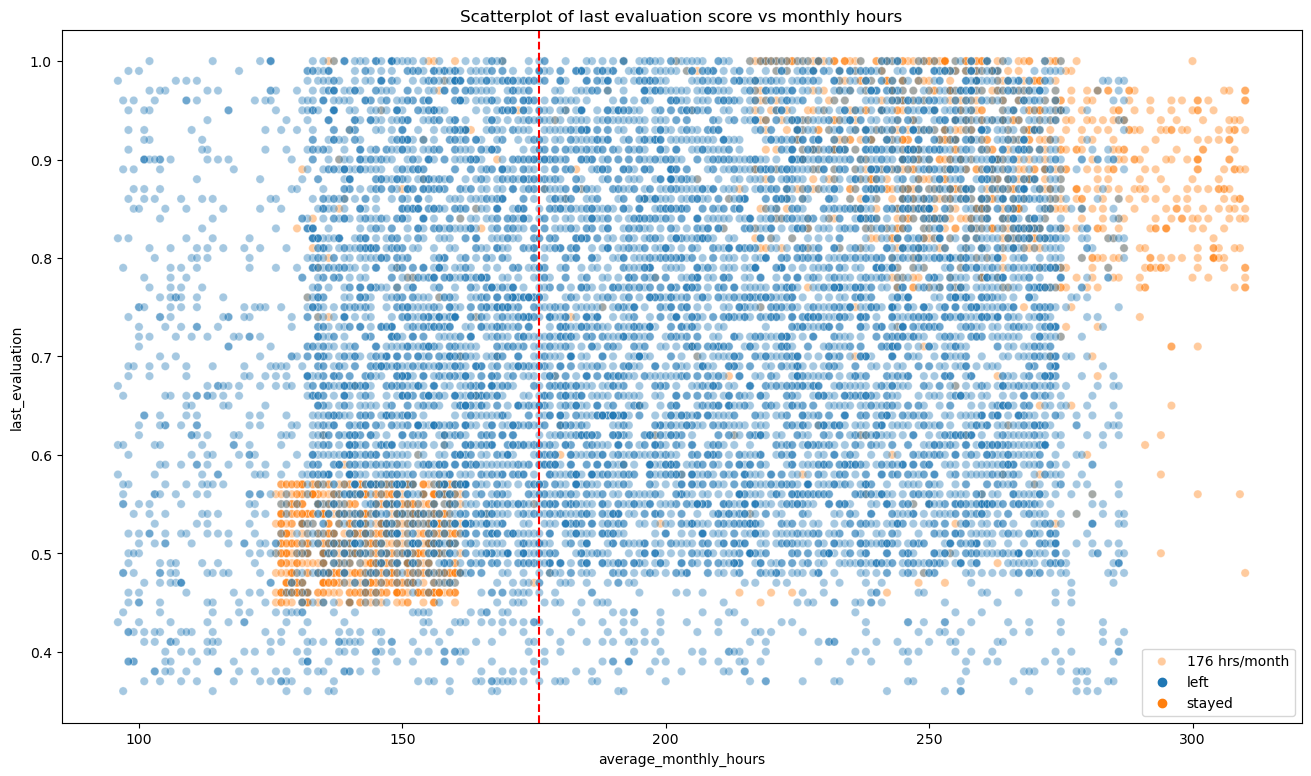

In [16]:
# Create scatterplot of last evaluation vs average monthly hours
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=176, color='r', ls='--')
plt.legend(labels=['176 hrs/month', 'left', 'stayed'])
plt.title('Scatterplot of last evaluation score vs monthly hours');

The following insights can be drawn from the visualisation above:

1. There are two major groups of employees who left; those that worked below average hours with lower end evaluation scores, and those that worked much higher hours with high evaluation scores.

2. There was a general positive correlation between monthly hours and evaluation score.

3. Most employees work over 176 hrs/month

Similarly, we will explore the relationship between average monthly hours and satisfaction level. 

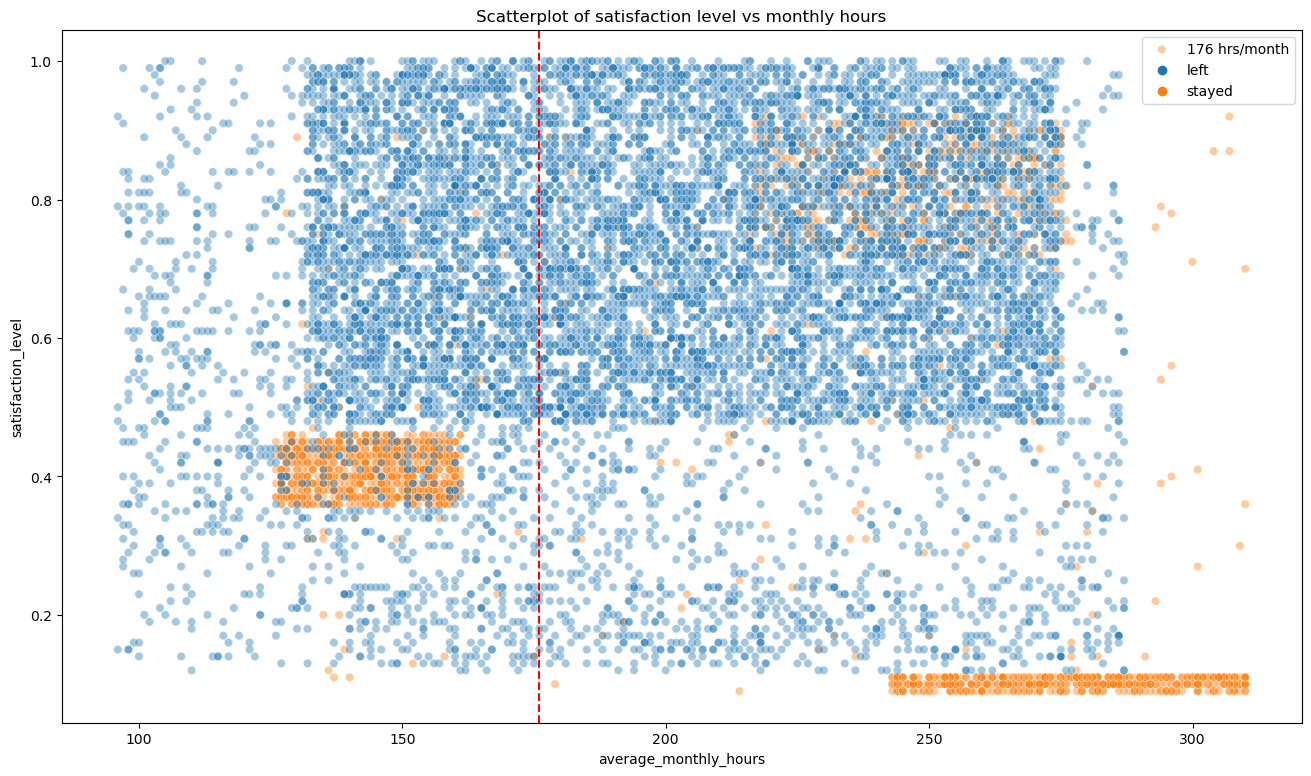

In [17]:
# Create scatterplot of average monthly hours vs satisfaction level
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=176, color='r', ls='--')
plt.legend(labels=['176 hrs/month', 'left', 'stayed'])
plt.title('Scatterplot of satisfaction level vs monthly hours');

The following insights can be drawn from the visualisation above:

1. Two major groups are seen which roughly coincide with those found in the visualisation prior of evaluation scores vs monthly hours. 

2. There was a significant group of employees who worked very long hours and had satisfaction levels of close to 0 that all left.

3. There was a group of employees who worked between 210~275 hrs/month who had high satisfaction levels that left. 

4. There was a group of employees who worked slightly below average hrs/month who had satisfaction levels of ~0.4 that left, possibly due to pressure to perform more and match peers.

5. It should also be noted that the strange shape of the distribution suggests possible data manipulation.

It is worth checking another variable pair before moving on, here we investigate the relationship between employees who were promoted in the last 5 years and their monthly hours worked.

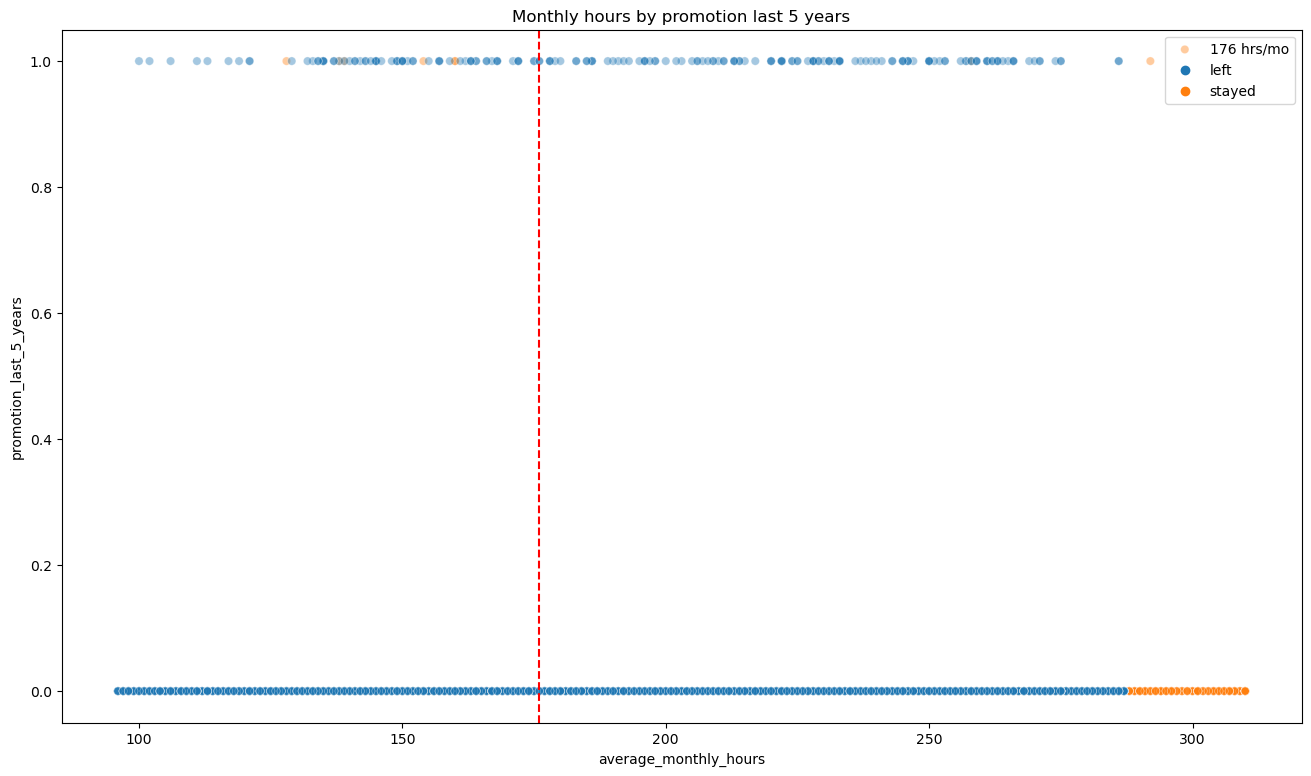

In [18]:
# Create plot to examine relationship between promotion_last_5_years and average_monthly_hours
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5_years', hue='left', alpha=0.4)
plt.axvline(x=176, color='r', ls='--')
plt.legend(labels=['176 hrs/mo', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years');

The following insights can be drawn from the visualisation above:

1. Very few employees who were promoted in the last 5 years left the company

2. All of the employees who worked the longest hours and were not promoted left

Here we create a visualisation to investigate the effect of employee department on whether an employee left or stayed.

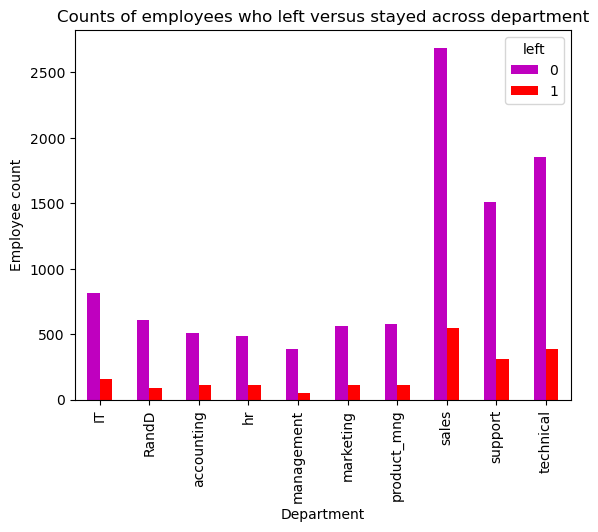

In [19]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left

pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Department does not seem to be a significant effect on whether an employee leaves or stays 

Lastly, we investigate the relationship between salary and hours worked

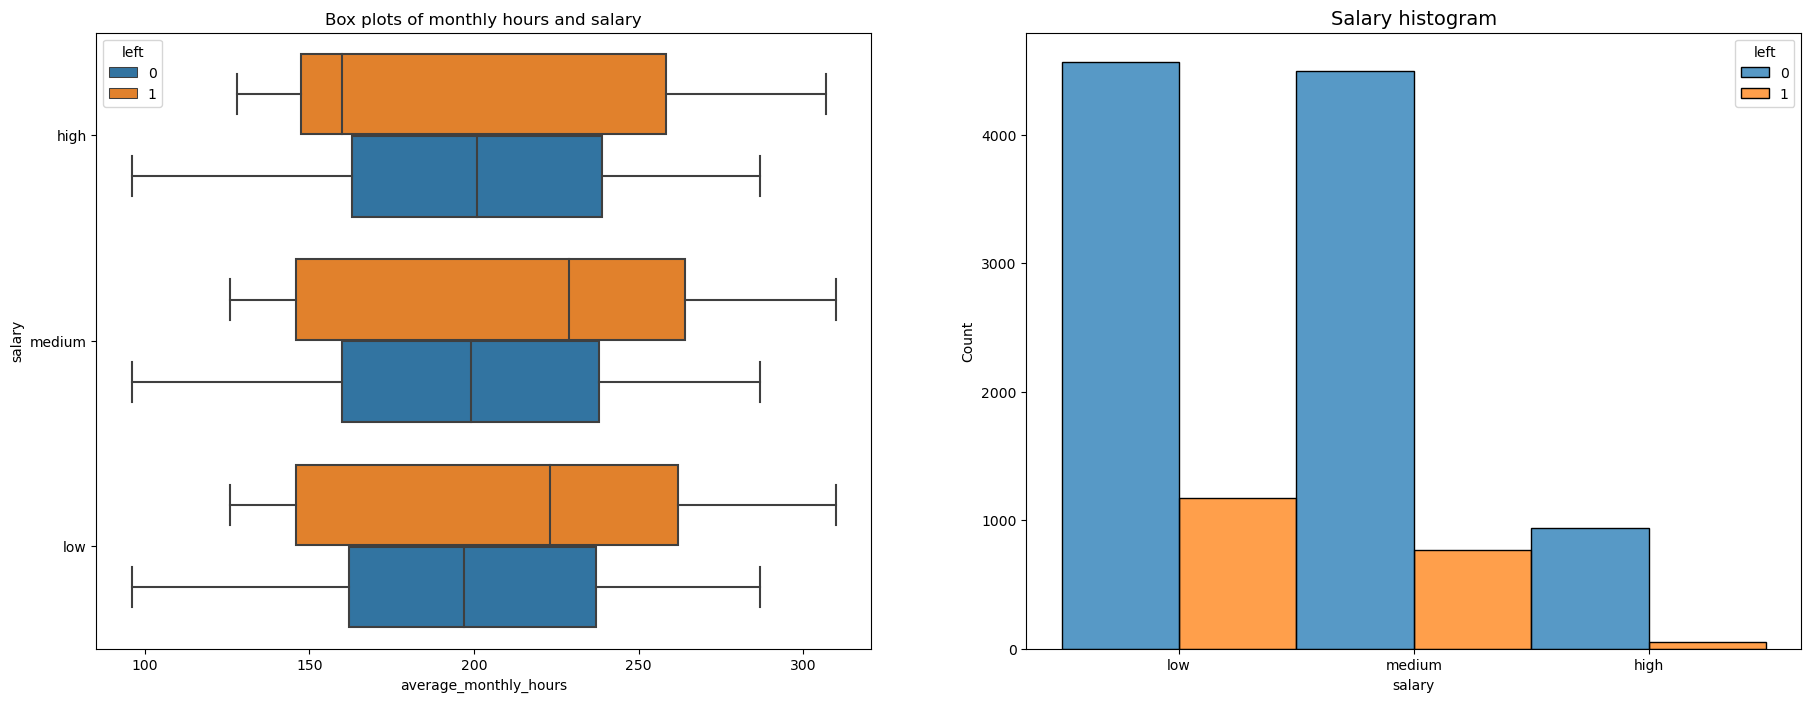

In [20]:
# Create a visualisation to investigate the relationship between salary and hours worked

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create stacked boxplot, with distinction between those that left and those that did not
sns.boxplot(data=df1, x='average_monthly_hours', y='salary', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis() # Invert for a more intuitive y-axis
ax[0].set_title('Box plots of monthly hours and salary')

# Create stacked boxplot, with distinction between those that left and those that did not
sns.histplot(data=df1, x='salary', hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title('Salary histogram', fontsize='14')

plt.show()

From the visualisation above, there doesn't seem to be any significant difference in the relationship between salary and hours worked for employees that left/stayed. 

### Insights

It would seem as though the majority of employees that leave the company do so because of being overworked and having low satisfaction levels, which is not a surprising reaction. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal here is to predict whether or not an employee will leave the company. This is a categorical outcome variable, and further a binary classification task. We are trying to predict the outcome variable `left`, taking a value of 1 if the employee left, or 0 if the employee didn't leave.

### Identify the types of models most appropriate for this task.

Both a Logistic Regression model and a tree-based machine learning model would work here. A tree-based machine learning model is chosen to move forward.

### Modeling

Add as many cells as you need to conduct the modeling process.

An XGBoost tree-based machine learning model will be used here.

First prepare the data for modelling

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5_years  11991 non-null  int64  
 8   department              11991 non-null  object 
 9   salary                  11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [22]:
print(df1['salary'].value_counts())
print()
print(df1['department'].value_counts())

low       5740
medium    5261
high       990
Name: salary, dtype: int64

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64


In [23]:
# Convert department and salary columns to numeric dummies ready for use in a model

# Department is a categorical nonordinal variable, so can be made into a dummy variable as normal
df2 = pd.get_dummies(df1, columns=['department'], drop_first=False)

# Salary is an categorical but ordinal variable, and so the heirachy needs to be preserved
df2['salary'] = df2['salary'].replace({'low': 0, 'medium': 1, 'high': 2})

In [24]:
# Check new format is as expected
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Now we remove the outlier rows from the column 'tenure' identified earlier.

In [25]:
# Remove rows that had outliers in 'tenure' column
df3 = df2[(df2['tenure'] >= lower_limit) & (df2['tenure'] <= upper_limit)]

df3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Isolate target and predictor variables

In [26]:
# Define the target (y) variable
y = df3['left']

# Define the predictor (X) variables
X = df3.drop(['left'], axis=1)

Divide the data into a training and a test set (75/25 split)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

Instantiate the XGBClassifier

In [28]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

Define the hyperparameter values for tuning

In [29]:
# Define parameters for tuning as `cv_params`.

cv_params = {'max_depth': [4, 6],
             'min_child_weight': [3, 5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [5,10,15],
             'subsample': [0.7],
             'colsample_bytree': [0.7]
            }

Define scoring criteria

In [30]:
# Define criteria as `scoring`.

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

Construct the GridSearch cross-validation

In [31]:
# Construct GridSearch.

xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

Fit the GridSearch model to the training data

In [32]:
%%time

# Fit the GridSearch model to training data

xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

CPU times: total: 1min 48s
Wall time: 10.5 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1',
             scoring={'roc_auc', 'f1', 'precision', 'accuracy', 'recall'})

In [33]:
# Check best params
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 10,
 'subsample': 0.7}

In [34]:
# Save model for later if needed
pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))

Now that the model has been fitted, formulate predictions on the test set

In [35]:
# Predict on the test data
y_pred = xgb_cv.predict(X_test)

Assess the model performance using the metrics identified earlier

In [36]:
# 1. Print the accuracy score.
ac_score = accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print the precision score.
pc_score = precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print the recall score.
rc_score = recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print the f1 score.
f1_score1 = f1_score(y_test, y_pred)
print('f1 score:', f1_score1)

# 5. Print the auc score.
roc_auc_score = roc_auc_score(y_test, y_pred)
print('auc score:', roc_auc_score)

accuracy score: 0.9824498567335244
precision score: 0.9730941704035875
recall score: 0.921443736730361
f1 score: 0.9465648854961832
auc score: 0.9581367757326945


Visualise the results better with a confusion matrix

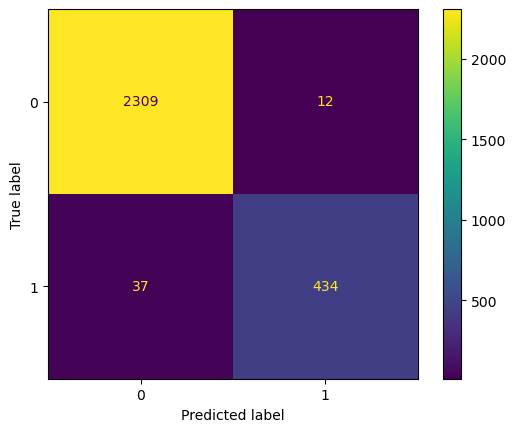

In [37]:
# Construct the confusion matrix for the predicted and test values.

cm = confusion_matrix(y_test, y_pred)

# Create the display for the confusion matrix.

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot the visual in-line.

disp.plot();

The model performs very well. The model predicts more false negatives than false positives, however the model is still a strong one.

For exploratory purposes, the most important features are investigated

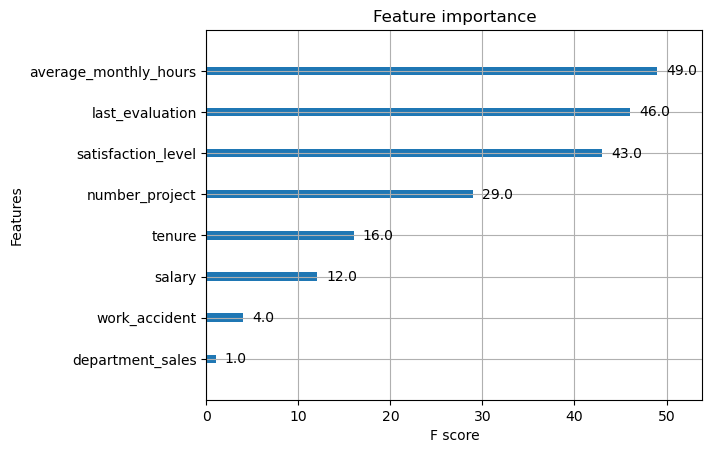

In [41]:
# Plot the relative feature importance of the predictor variables in the model
plot_importance(xgb_cv.best_estimator_);

Average monthly hours, evaluation scores, satisfaction levels and number of projects are rated as the most important features of the model. 

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The XGBoost model achieved the following scores on the test set:

- accuracy score: 0.9824498567335244
- precision score: 0.9730941704035875
- recall score: 0.921443736730361
- f1 score: 0.9465648854961832
- auc score: 0.9581367757326945

### Conclusion, Recommendations, Next Steps

The model and subsequent analysis show conclusively that the employees at this company are overworked. 

To retain employees, the following recommendations should be considered by the stakeholders:

- Provide better incentives for employees to work longer hours, or cease requiring them to do so. 
- High evaluation scores should not be dominated by employees working 200+ hours.
- Cap the number of projects an employee can work on

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.